In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett

In [2]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train['target_3'] = train['target_3'].astype(int)
수치형_col = train.select_dtypes(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3468 non-null   int32  
 1   target_2               3468 non-null   int32  
 2   target_3               3468 non-null   int32  
 3   회계년도                   3468 non-null   int64  
 4   회사명                    3468 non-null   object 
 5   거래소코드                  3468 non-null   int64  
 6   산업군                    3468 non-null   object 
 7   차입금의존도                 3468 non-null   float64
 8   부채비율                   3468 non-null   float64
 9   순운전자본비율                3468 non-null   float64
 10  총자본정상영업이익률             3468 non-null   float64
 11  자기자본순이익률               3468 non-null   float64
 12  총자본순이익률                3468 non-null   float64
 13  매출액총이익률                3468 non-null   float64
 14  금융비용부담률                3468 non-null   float64
 15  자본금회

In [3]:
# 정상
pd.set_option('display.max_columns',None)
train[train['target_1']==0].describe()

,target_1,target_2,target_3,회계년도,거래소코드,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,재고자산회전률,자기자본회전률,타인자본회전률,총자본회전률,외국인지분율,대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,업력,누적수익성비율,이자부담률,부채상환계수,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,EBITDA마진율,PBR변화율,ROA변화율,현금흐름/총부채비율,영업현금흐름-단기차입금,abs(영업현금흐름-당기순이익)/매출액
count,3428.0,3428.0,3428.0,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,0.0,0.0,0.0,2015.044341,29903.445158,-0.010374,-0.030983,0.017198,0.036585,0.049100,0.042858,0.020301,-0.049714,0.006460,-0.018409,0.000311,-0.000158,0.014200,0.010671,0.005928,0.006013,-0.015598,0.016332,0.001263,0.020317,0.018196,-0.000606,0.040161,0.002709,0.001414,0.016438,0.019004,-0.049605,0.001760,0.041166,0.007466,-0.003291,0.041479,-0.009423,0.025903,0.012936,0.003689,-0.028791
std,0.0,0.0,0.0,2.012165,42755.770950,0.976331,0.811109,0.975505,0.911681,0.408679,0.829003,0.950817,0.629196,1.003902,0.726660,1.003340,0.978490,0.996373,0.998051,1.000805,0.993514,0.176303,0.981474,0.372164,0.972312,0.890203,1.000854,0.894100,1.005615,1.005877,0.958226,0.139822,0.682224,0.989092,0.822075,1.000286,0.997679,0.749894,0.259252,0.645413,0.988327,0.998524,0.124167
min,0.0,0.0,0.0,2012.000000,40.000000,-1.494577,-0.837400,-2.751734,-5.207220,-4.096742,-5.851877,-2.573371,-2.104020,-0.708484,-0.291699,-0.264738,-1.260361,-1.568961,-1.810995,-0.803454,-2.390024,-0.567763,-3.672472,-1.429375,-3.646990,-7.743797,-2.048218,-5.852451,-0.393885,-0.163161,-4.131494,-0.904076,-0.585388,-0.964989,-6.216758,-1.600211,-12.907075,-5.159523,-0.515808,-6.448416,-3.802537,-7.373849,-0.140515
25%,0.0,0.0,0.0,2013.000000,4090.000000,-0.795794,-0.525894,-0.652542,-0.420530,-0.027292,-0.256948,-0.602418,-0.402478,-0.540451,-0.213461,-0.222314,-0.631589,-0.683417,-0.675086,-0.678356,-0.711637,-0.078303,-0.444406,-0.126725,-0.434368,-0.180842,-0.583927,-0.519240,-0.199199,-0.113590,-0.521003,-0.051906,-0.447944,-0.585711,-0.279985,-0.314675,0.018733,-0.382709,-0.165961,-0.042592,-0.530712,-0.098168,-0.107290
50%,0.0,0.0,0.0,2015.000000,10600.000000,-0.063228,-0.240549,0.014504,0.000382,0.101425,0.074774,-0.220334,-0.178372,-0.315082,-0.163577,-0.198279,-0.283299,-0.200393,-0.162813,-0.418237,0.045338,-0.049376,-0.073878,-0.034223,-0.100777,-0.055937,0.121102,0.049683,-0.184390,-0.112128,0.020811,0.012901,-0.284914,-0.293461,0.065048,-0.274136,0.106257,-0.071274,-0.065073,0.035592,-0.164999,0.017944,-0.062322
75%,0.0,0.0,0.0,2017.000000,34310.000000,0.676033,0.194331,0.694131,0.506703,0.231350,0.499828,0.339936,0.161937,0.162236,-0.082189,-0.150351,0.323897,0.450958,0.460823,0.344216,0.705920,0.003810,0.322509,0.076549,0.289228,0.103291,0.663431,0.649722,-0.139996,-0.107832,0.571098,0.089317,0.069264,0.206364,0.475499,-0.139564,0.163021,0.335857,0.077665,0.138803,0.348567,0.076483,0.004488
max,0.0,0.0,0.0,2018.000000,272550.000000,2.810729,7.890693,3.007457,3.237438,1.698090,3.216987,3.782758,4.399193,10.652019,9.995316,14.607997,6.821205,4.900636,4.603552,4.923465,2.528583,2.374174,10.281916,5.072651,10.586103,10.972429,3.103916,2.108193,23.631743,22.175885,3.409982,0.646299,5.393410,8.900998,2.674974,10.732121,7.123683,4.133443,1.938515,6.719997,5.618783,10.505255,1.776261


In [4]:
# 부실
train[train['target_1']==1].describe()

,target_1,target_2,target_3,회계년도,거래소코드,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,재고자산회전률,자기자본회전률,타인자본회전률,총자본회전률,외국인지분율,대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,업력,누적수익성비율,이자부담률,부채상환계수,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,EBITDA마진율,PBR변화율,ROA변화율,현금흐름/총부채비율,영업현금흐름-단기차입금,abs(영업현금흐름-당기순이익)/매출액
count,40.0,40.0,40.0,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.0,1.0,1.0,2014.025000,28331.50000,0.889076,2.655276,-1.473827,-3.135363,-4.207887,-3.672938,-1.739817,4.260476,-0.553628,1.577643,-0.026623,0.013518,-1.216939,-0.914518,-0.508028,-0.515274,1.336763,-1.399693,-0.108239,-1.741185,-1.559397,0.051955,-3.441798,-0.232172,-0.121220,-1.408739,-1.628601,4.251182,-0.150839,-3.527950,-0.639822,0.282014,-3.554732,0.807516,-2.219866,-1.108604,-0.316114,2.467406
std,0.0,0.0,0.0,1.656185,37613.46503,2.083635,4.878198,1.746306,2.384757,7.474936,3.812581,2.518240,5.941496,0.214854,6.319897,0.680127,2.188764,0.388486,0.725091,0.801225,1.382719,9.183553,1.498035,8.760147,1.644445,4.094500,0.947814,2.526982,0.075510,0.010118,2.486017,9.189835,5.410430,1.712979,4.077265,0.759149,1.173114,5.137882,9.074165,6.870684,1.347410,1.098568,9.013948
min,1.0,1.0,1.0,2012.000000,360.00000,-1.494577,-0.872169,-7.485258,-9.208713,-30.354111,-10.773641,-14.631465,-0.518680,-0.713780,-0.301676,-0.264738,-1.383649,-1.671421,-2.122814,-0.803454,-2.705036,-0.630544,-4.322547,-13.622414,-4.836854,-21.061325,-1.885519,-13.769880,-0.688734,-0.152468,-11.762203,-58.252228,-0.578284,-1.012262,-11.603341,-5.129567,-1.954369,-30.734006,-27.231016,-31.768036,-7.757123,-5.084847,-0.091330
25%,1.0,1.0,1.0,2013.000000,4187.50000,-1.227663,-0.872169,-2.597002,-4.942971,-4.652805,-6.378042,-2.376797,1.195313,-0.681599,-0.251399,-0.233303,-1.383649,-1.499435,-1.443495,-0.794827,-1.588002,-0.209338,-2.484662,-3.451675,-2.737961,-0.899223,-0.380554,-4.505138,-0.231209,-0.121608,-1.890496,-0.384526,0.324587,-0.958285,-6.588308,-0.682911,0.063003,-4.114259,-0.760375,-0.876899,-1.293893,-0.116712,0.150376
50%,1.0,1.0,1.0,2014.000000,8280.00000,0.505598,0.372189,-1.337487,-2.547738,-1.372709,-3.115662,-1.343153,2.465244,-0.630883,-0.204797,-0.205256,-1.189470,-1.342086,-1.109404,-0.753415,-0.768654,-0.115144,-1.428778,-1.053002,-1.624686,-0.096963,0.256684,-2.868294,-0.214738,-0.117486,-0.978668,-0.118457,1.795922,-0.803546,-2.862219,-0.469241,0.144785,-1.895931,-0.311711,-0.142493,-0.755070,0.030475,0.607280
75%,1.0,1.0,1.0,2015.000000,37090.00000,2.522664,4.940051,-0.239838,-1.605877,-0.055661,-1.294111,-0.833491,5.066322,-0.515347,0.045933,-0.060322,0.605920,-1.137167,-0.574859,-0.557787,0.161263,-0.078328,-0.623423,0.870254,-0.937445,0.071550,0.609198,-1.871572,-0.209439,-0.115072,-0.192562,0.032149,7.233200,-0.443306,-1.331360,-0.359477,0.173333,-1.207414,0.522170,0.089945,-0.525813,0.051495,1.647926
max,1.0,1.0,1.0,2018.000000,117930.00000,4.918034,20.598609,1.585947,2.029441,-0.055661,7.575642,2.501768,31.922682,0.419887,35.014748,4.032961,7.702719,-0.032066,1.596733,4.224639,2.444159,57.925528,2.602641,37.567807,4.960262,0.647238,1.476926,0.515497,-0.203106,-0.112411,3.167020,0.561816,19.710062,8.261463,8.127828,-0.142782,6.350530,3.314146,45.654994,0.664720,0.712694,0.410293,57.551087


In [5]:

pd.reset_option('display.max_columns',None)

---
## 정규성 검정
---

In [6]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [7]:
normal_test('shapiro',수치형_col)

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                재고자산회전률
 11                자기자본회전률
 12                타인자본회전률
 13                 총자본회전률
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                     업력
 22                누적수익성비율
 23                  이자부담률
 24                 부채상환계수
 25              현금흐름 대 자산
 26             현금흐름 대 매출액
 27                    TMD
 28                 시총/총자산
 29               EBIT/총자산
 30               당기전기영업손익
 31                 FINDEP
 32              EBITDA마진율
 33                 PBR변화율
 34    

In [8]:
normal_test('kstest',수치형_col)

(    normal
 0  순운전자본비율,
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2              총자본정상영업이익률
 3                자기자본순이익률
 4                 총자본순이익률
 5                 매출액총이익률
 6                 금융비용부담률
 7                  자본금회전률
 8                 유형자산회전율
 9                 재고자산회전률
 10                자기자본회전률
 11                타인자본회전률
 12                 총자본회전률
 13                 외국인지분율
 14                 대주주지분율
 15                유형자산증가율
 16                 매출액증가율
 17                자기자본증가율
 18                 총자본증가율
 19              정상영업이익증가율
 20                     업력
 21                누적수익성비율
 22                  이자부담률
 23                 부채상환계수
 24              현금흐름 대 자산
 25             현금흐름 대 매출액
 26                    TMD
 27                 시총/총자산
 28               EBIT/총자산
 29               당기전기영업손익
 30                 FINDEP
 31              EBITDA마진율
 32                 PBR변화율
 33                 ROA변화율
 34             현금흐름/총부채비율
 35

---
## 등분산성검정
---

In [9]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train.info()
수치형_col = train.select_dtypes(float)
col_int = 수치형_col.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3468 non-null   int32  
 1   target_2               3468 non-null   int32  
 2   target_3               3468 non-null   float64
 3   회계년도                   3468 non-null   int64  
 4   회사명                    3468 non-null   object 
 5   거래소코드                  3468 non-null   int64  
 6   산업군                    3468 non-null   object 
 7   차입금의존도                 3468 non-null   float64
 8   부채비율                   3468 non-null   float64
 9   순운전자본비율                3468 non-null   float64
 10  총자본정상영업이익률             3468 non-null   float64
 11  자기자본순이익률               3468 non-null   float64
 12  총자본순이익률                3468 non-null   float64
 13  매출액총이익률                3468 non-null   float64
 14  금융비용부담률                3468 non-null   float64
 15  자본금회

In [10]:
def homoscedasticity_test(df, col,tool):
        dict_1 = {"변수" : [], "p_val" : [], "T" : [] }
        dict_2 = {"변수" : [], "p_val" : [], "T" : [] }
        if tool == "levene":
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_1["변수"].append(i)
                        dict_1["p_val"].append(p_val)
                        dict_1["T"].append(T)

                return  pd.DataFrame(dict_1)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_2["변수"].append(i)
                        dict_2["p_val"].append(p_val)
                        dict_2["T"].append(T)

                        
                return pd.DataFrame(dict_2) 


In [11]:
## 정규성을 따를때 등분산성 검정
bartlett = homoscedasticity_test(수치형_col,col_int,"bartlett")

bartlett[bartlett['p_val']>0.05]
#

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,변수,p_val,T
15,외국인지분율,0.069772,3.288372
22,업력,0.639895,0.218879
32,FINDEP,0.134857,2.235685
37,영업현금흐름-단기차입금,0.388821,0.742626


In [12]:
# 정규성을 따르지 않을때 등분산성 검정
levene = homoscedasticity_test(수치형_col, col_int,"levene")

등분산변수 = levene[levene['p_val']>0.05]['변수'].to_list()
이분산변수 = levene[levene['p_val']<0.05]['변수'].to_list()

levene[levene['p_val']>0.05]

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,변수,p_val,T
11,재고자산회전률,0.919366,0.010250
14,총자본회전률,0.076050,3.149237
22,업력,0.558413,0.342526
24,이자부담률,0.253572,1.303948
25,부채상환계수,0.492094,0.472045
29,시총/총자산,0.160680,1.968656
31,당기전기영업손익,0.772609,0.083513
32,FINDEP,0.377696,0.778388
36,현금흐름/총부채비율,0.698918,0.149625
37,영업현금흐름-단기차입금,0.547763,0.361411


---
##t-test
---

In [13]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [14]:
## 등분산성 t-test
student = t_test(수치형_col,등분산변수,'student')
student[student['p_val']<0.05]

student_변수  = student[student['p_val']<0.05]['변수'].to_list()
student[student['p_val']<0.05]

,변수,p_val,t-val
1,총자본회전률,5.551610e-09,-5.844476
6,당기전기영업손익,4.630558e-05,-4.078707
8,현금흐름/총부채비율,1.492927e-12,-7.101283
9,영업현금흐름-단기차입금,4.434947e-02,-2.011504


In [15]:
## 이분산성 t-test
welch = t_test(수치형_col,이분산변수,'welch')


welch_변수  = welch[welch['p_val']<0.05]['변수'].to_list()
welch[welch['p_val']<0.05]

,변수,p_val,t-val
0,차입금의존도,9.519215e-03,2.726653
1,부채비율,1.241475e-03,3.482158
2,순운전자본비율,3.561486e-06,-5.390206
3,총자본정상영업이익률,2.677011e-10,-8.405080
4,자기자본순이익률,8.820505e-04,-3.601781
5,총자본순이익률,3.068666e-07,-6.162303
6,매출액총이익률,7.685528e-05,-4.416861
7,금융비용부담률,4.552905e-05,4.587775
8,자본금회전률,8.479764e-22,-14.718507
11,타인자본회전률,1.788684e-23,-19.315393


In [16]:
t_검정변수 = student_변수 + welch_변수
t_검정변수

['총자본회전률',
 '당기전기영업손익',
 '현금흐름/총부채비율',
 '영업현금흐름-단기차입금',
 '차입금의존도',
 '부채비율',
 '순운전자본비율',
 '총자본정상영업이익률',
 '자기자본순이익률',
 '총자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '자본금회전률',
 '타인자본회전률',
 '외국인지분율',
 '대주주지분율',
 '매출액증가율',
 '총자본증가율',
 '정상영업이익증가율',
 '누적수익성비율',
 '현금흐름 대 자산',
 'TMD',
 'EBIT/총자산',
 'EBITDA마진율',
 'ROA변화율']

---
## 다중공선성 상관계수 확인
---

In [17]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
test = pd.read_csv('./datasets/전처리완료/코스피_test_std.csv',index_col=0)
명목형_col = [['회사명','거래소코드','회계년도','산업군','target_1','target_2','target_3']]

수치형_col = train[t_검정변수]
수치형_col 

,총자본회전률,당기전기영업손익,현금흐름/총부채비율,영업현금흐름-단기차입금,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,...,대주주지분율,매출액증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,TMD,EBIT/총자산,EBITDA마진율,ROA변화율
0,-1.075995,-0.421942,-0.259113,0.195358,2.089424,1.155437,-1.672112,-0.981116,-0.371644,-0.737224,...,-0.469707,0.147576,-0.539699,0.185638,-2.750262,0.256820,0.333176,-0.683425,1.256893,0.158623
1,-1.187359,-0.369298,-0.523518,0.100671,2.323772,1.964438,-1.813226,-0.894291,-1.066987,-1.488555,...,-0.469707,-1.109687,-0.887494,0.089683,-1.251282,-0.341301,0.172712,-0.879980,1.201668,-0.265010
2,-0.942359,-0.273265,-0.409632,0.138302,2.574555,3.999187,-1.247216,0.111744,-1.483771,-1.496333,...,-0.462777,0.577017,-0.776739,2.119437,-1.570134,0.014400,0.675523,-0.785651,1.965486,0.045862
3,-0.452359,0.137112,1.266144,0.527776,1.110641,0.411074,-0.070579,2.571152,0.839172,1.070326,...,-1.618243,0.630890,-0.291904,0.087783,-0.790055,3.293482,-0.322735,1.274034,3.132566,-0.005197
4,-0.652813,0.165720,1.038376,0.403931,0.682728,-0.068815,0.519295,1.999241,0.777907,1.406326,...,-1.582332,-0.876395,-0.257526,-0.120400,-0.378898,2.203830,-0.293554,1.256438,2.994066,0.088434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,-1.833268,-0.381455,-3.246948,0.043596,-1.304055,-0.512915,-1.481194,-9.208713,-2.075296,-3.118773,...,2.012592,-4.322547,-4.638129,-0.273686,-3.139134,-3.580035,-0.578284,-3.042877,-30.734006,0.068801
3464,-1.187359,-1.025647,-0.541565,0.188894,1.217163,12.230177,-0.759026,-1.447328,-5.811862,-5.262323,...,-1.931366,-2.930535,-2.455331,-0.081239,-1.883062,-0.318374,8.330526,-5.633456,-1.211531,-0.609047
3465,-1.120541,-0.591790,-0.855428,-0.038836,3.914294,-0.872169,-1.206750,-7.711928,-0.055661,-10.773641,...,0.983761,-3.543176,-3.245723,-2.812587,-5.126754,-1.645195,7.409922,-10.538273,-9.416211,-26.971303
3466,-1.053722,-0.340601,-1.754493,0.023293,-0.238228,2.324984,-1.681970,-1.822939,-0.055661,5.682536,...,1.423518,0.538423,-1.401893,0.076484,-4.136754,-3.557397,-0.438353,5.711117,-1.860199,0.664720


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,16.071973,EBIT/총자산
1,15.942543,총자본순이익률
2,6.069270,현금흐름/총부채비율
3,5.659713,총자본정상영업이익률
4,4.981832,현금흐름 대 자산
5,4.786696,타인자본회전률
6,2.970320,총자본회전률
7,2.575776,차입금의존도
8,2.471810,EBITDA마진율
9,2.417836,누적수익성비율


In [19]:
##
수치형_col = 수치형_col.drop('EBIT/총자산',axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,6.059058,현금흐름/총부채비율
1,5.033213,총자본정상영업이익률
2,5.016177,총자본순이익률
3,4.973682,현금흐름 대 자산
4,4.763565,타인자본회전률
5,2.962086,총자본회전률
6,2.556261,차입금의존도
7,2.459786,EBITDA마진율
8,2.413191,누적수익성비율
9,2.353527,순운전자본비율


C:\Users\msi\AppData\Local\Temp\ipykernel_17540\2754315082.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

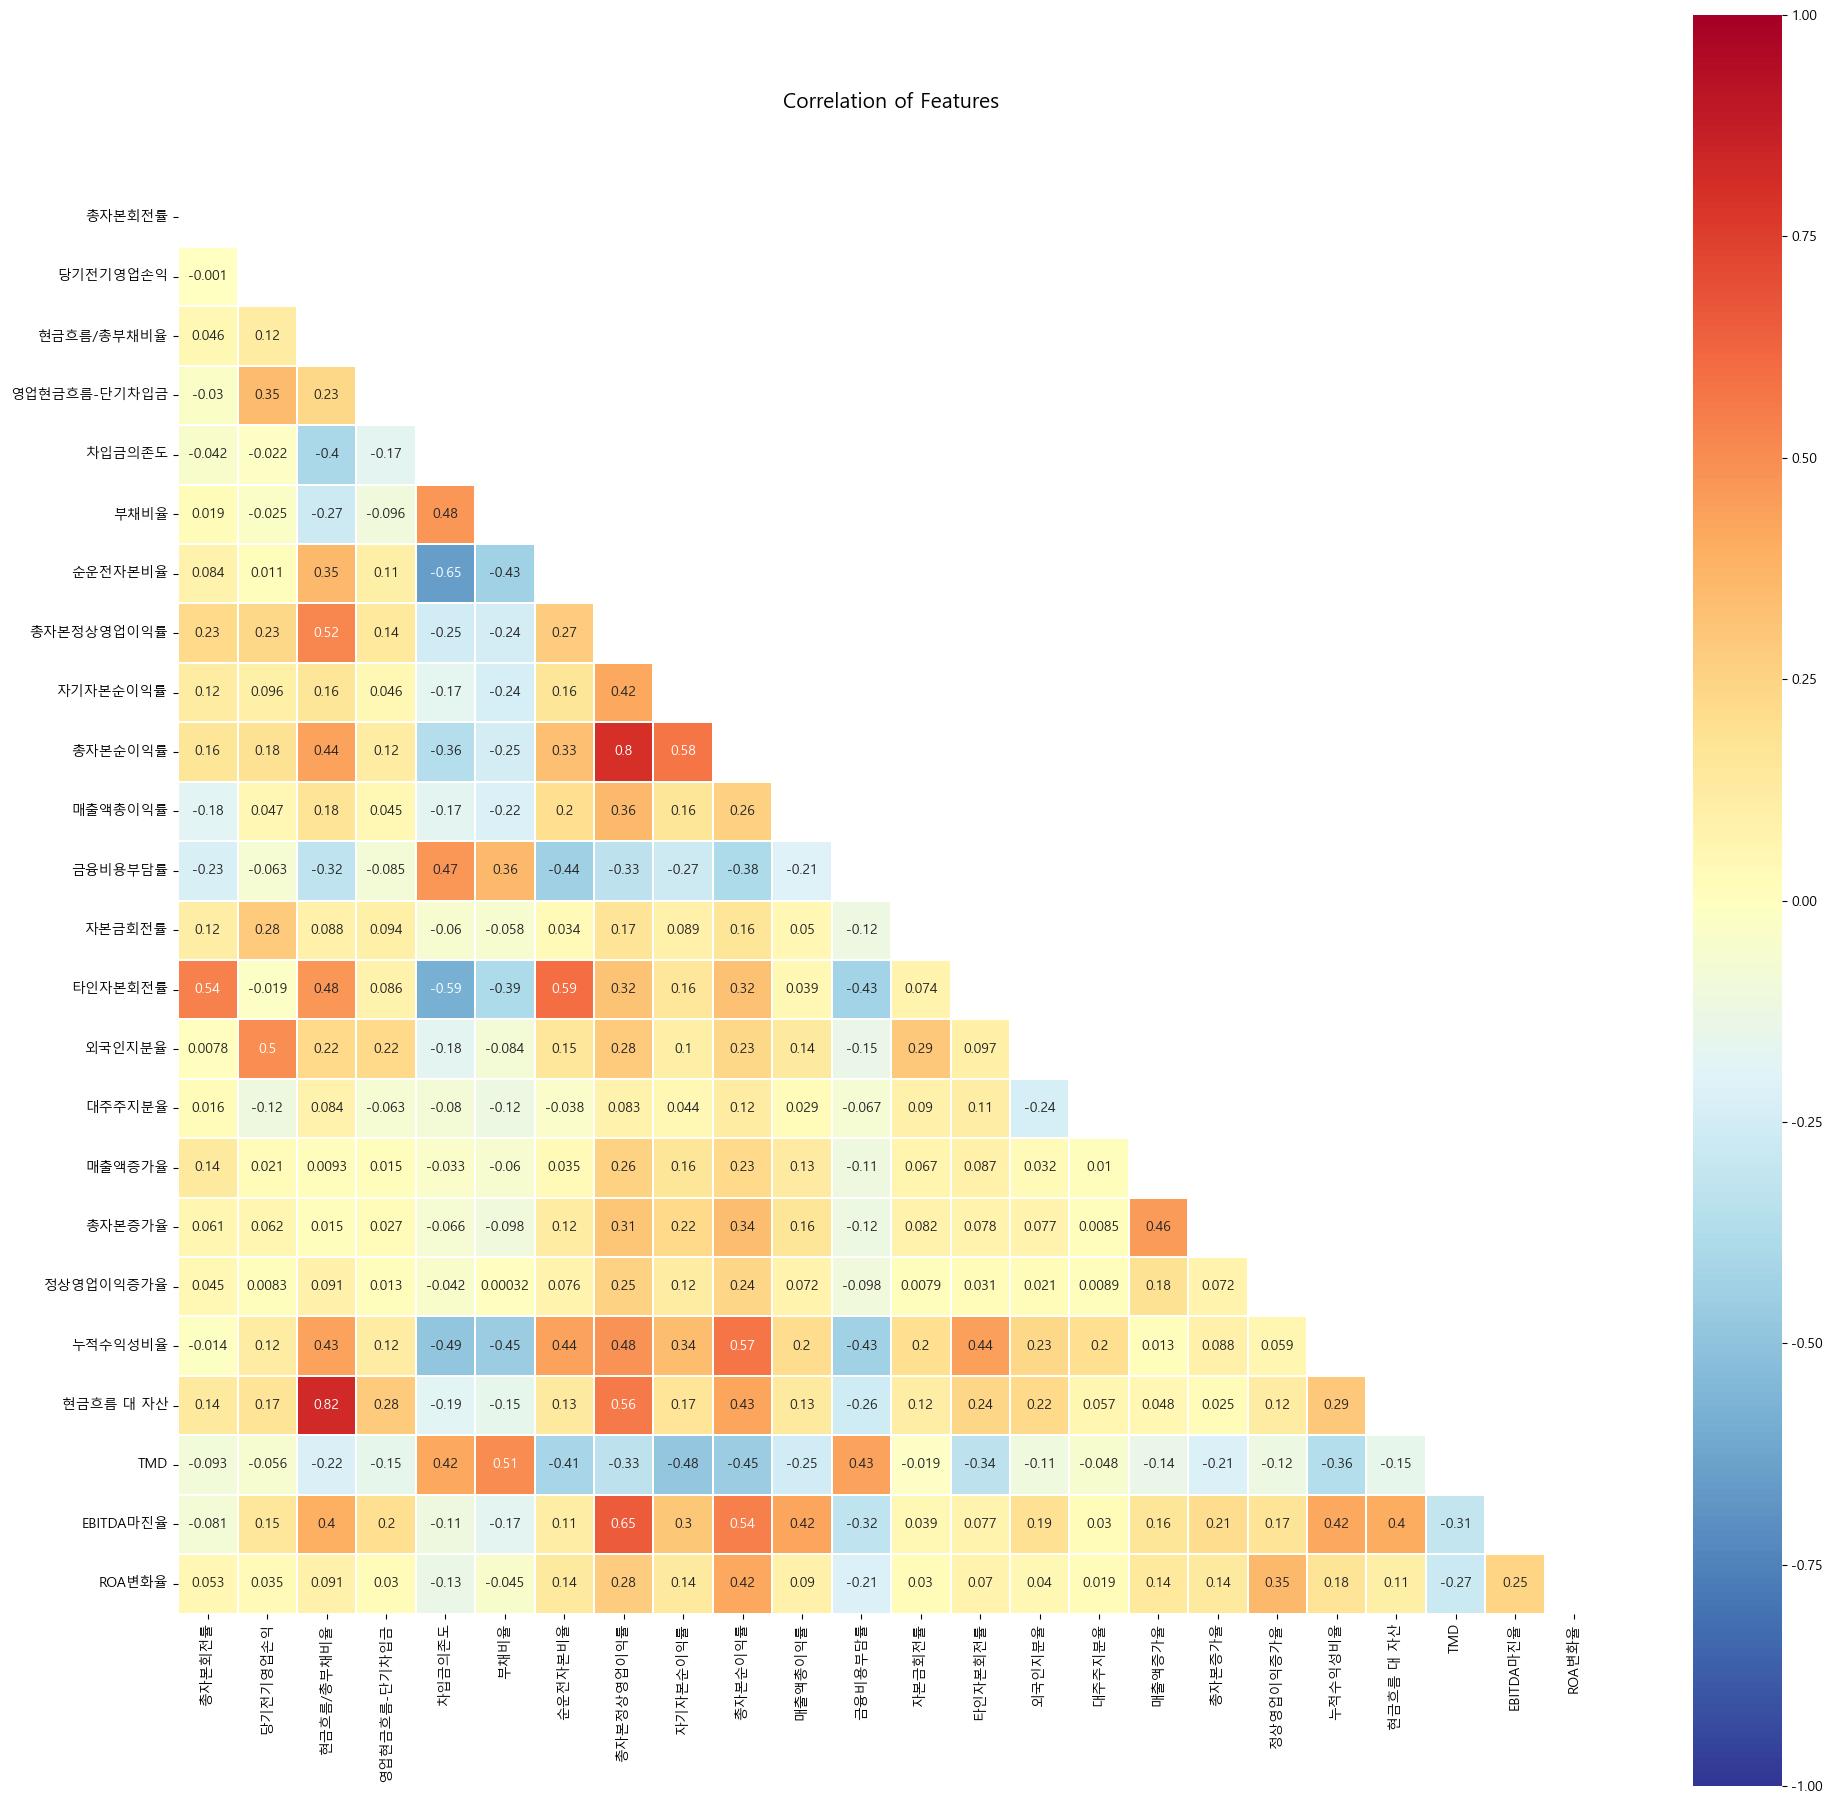

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot

corr = 수치형_col.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(23, 23))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})

In [21]:
last_col = 명목형_col[0]+vif['features'].to_list()
last_col

['회사명',
 '거래소코드',
 '회계년도',
 '산업군',
 'target_1',
 'target_2',
 'target_3',
 '현금흐름/총부채비율',
 '총자본정상영업이익률',
 '총자본순이익률',
 '현금흐름 대 자산',
 '타인자본회전률',
 '총자본회전률',
 '차입금의존도',
 'EBITDA마진율',
 '누적수익성비율',
 '순운전자본비율',
 'TMD',
 '자기자본순이익률',
 '부채비율',
 '금융비용부담률',
 '외국인지분율',
 '당기전기영업손익',
 'ROA변화율',
 '총자본증가율',
 '매출액총이익률',
 '매출액증가율',
 '영업현금흐름-단기차입금',
 '자본금회전률',
 '대주주지분율',
 '정상영업이익증가율']

In [22]:
train = train[last_col]
test = test[last_col]

In [23]:
train.to_csv('./datasets/통계검증완료/코스피_standard_train.csv',encoding='utf-8-sig')
test.to_csv('./datasets/통계검증완료/코스피_standard_test.csv',encoding='utf-8-sig')